In [ ]:
#Read data & perform basic analysis

In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [251]:
df= pd.read_csv('Downloads/Bitcoin/bitcoin_price_Training - Training.csv')

In [739]:
df.head(3)

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


In [741]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [253]:
df.shape

(1556, 7)

In [743]:
df.info

<bound method DataFrame.info of            Date     Open     High      Low    Close         Volume  \
0    2017-07-31  2763.24  2889.62  2720.61  2875.34    860,575,000   
1    2017-07-30  2724.39  2758.53  2644.85  2757.18    705,943,000   
2    2017-07-29  2807.02  2808.76  2692.80  2726.45    803,746,000   
3    2017-07-28  2679.73  2897.45  2679.73  2809.01  1,380,100,000   
4    2017-07-27  2538.71  2693.32  2529.34  2671.78    789,104,000   
...         ...      ...      ...      ...      ...            ...   
1551 2013-05-02   116.38   125.60    92.28   105.21              -   
1552 2013-05-01   139.00   139.89   107.72   116.99              -   
1553 2013-04-30   144.00   146.93   134.05   139.00              -   
1554 2013-04-29   134.44   147.49   134.00   144.54              -   
1555 2013-04-28   135.30   135.98   132.10   134.21              -   

          Market Cap  
0     45,535,800,000  
1     44,890,700,000  
2     46,246,700,000  
3     44,144,400,000  
4     41,816

In [254]:
df.describe()

,Open,High,Low,Close
count,1556.000000,1556.000000,1556.000000,1556.000000
mean,582.625328,597.992847,567.851446,584.239396
std,523.137312,542.992855,505.877401,525.904442
min,68.500000,74.560000,65.530000,68.430000
25%,254.287500,260.327500,248.835000,254.320000
50%,438.600000,447.560000,430.570000,438.855000
75%,662.437500,674.525000,646.735000,663.402500
max,2953.220000,2999.910000,2840.530000,2958.110000


In [255]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1556.0,582.625328,523.137312,68.50,254.2875,438.600,662.4375,2953.22
High,1556.0,597.992847,542.992855,74.56,260.3275,447.560,674.5250,2999.91
Low,1556.0,567.851446,505.877401,65.53,248.8350,430.570,646.7350,2840.53
Close,1556.0,584.239396,525.904442,68.43,254.3200,438.855,663.4025,2958.11


In [ ]:
#Data Pre-processing

In [745]:
df.dtypes

Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume                object
Market Cap            object
dtype: object

In [ ]:
                 Date is to be in Date-time format inorder to perform a time series analysis but In the current dataset 
                     the date is stated as an object which is to be converted in the date time format..

In [257]:
df['Date']= df['Date'].astype('datetime64[ns]')

In [258]:
df['Date']


0      2017-07-31
1      2017-07-30
2      2017-07-29
3      2017-07-28
4      2017-07-27
          ...    
1551   2013-05-02
1552   2013-05-01
1553   2013-04-30
1554   2013-04-29
1555   2013-04-28
Name: Date, Length: 1556, dtype: datetime64[ns]

In [259]:
df['Date'].min()

Timestamp('2013-04-28 00:00:00')

In [747]:
df['Date'].max()

Timestamp('2017-07-31 00:00:00')

In [749]:
df['Date']

0      2017-07-31
1      2017-07-30
2      2017-07-29
3      2017-07-28
4      2017-07-27
          ...    
1551   2013-05-02
1552   2013-05-01
1553   2013-04-30
1554   2013-04-29
1555   2013-04-28
Name: Date, Length: 1556, dtype: datetime64[ns]

In [261]:
type(df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [262]:
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [263]:
df.duplicated().sum()

0

In [751]:
df.head(3)

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


In [753]:
df.tail(5)

,Date,Open,High,Low,Close,Volume,Market Cap
1551,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
1552,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"


In [755]:
data = df.sort_index(ascending=False).reset_index()

In [757]:
data

,index,Date,Open,High,Low,Close,Volume,Market Cap
0,1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
3,1552,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
4,1551,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...,...,...
1551,4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
1552,3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
1553,2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
1554,1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"


In [ ]:
#Analysing change in price of the stock overtime?

In [763]:
data.drop('index' , axis=1 , inplace=True)

In [765]:
data

,Date,Open,High,Low,Close,Volume,Market Cap
0,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
3,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
4,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...,...
1551,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
1552,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
1553,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
1554,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"


In [767]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

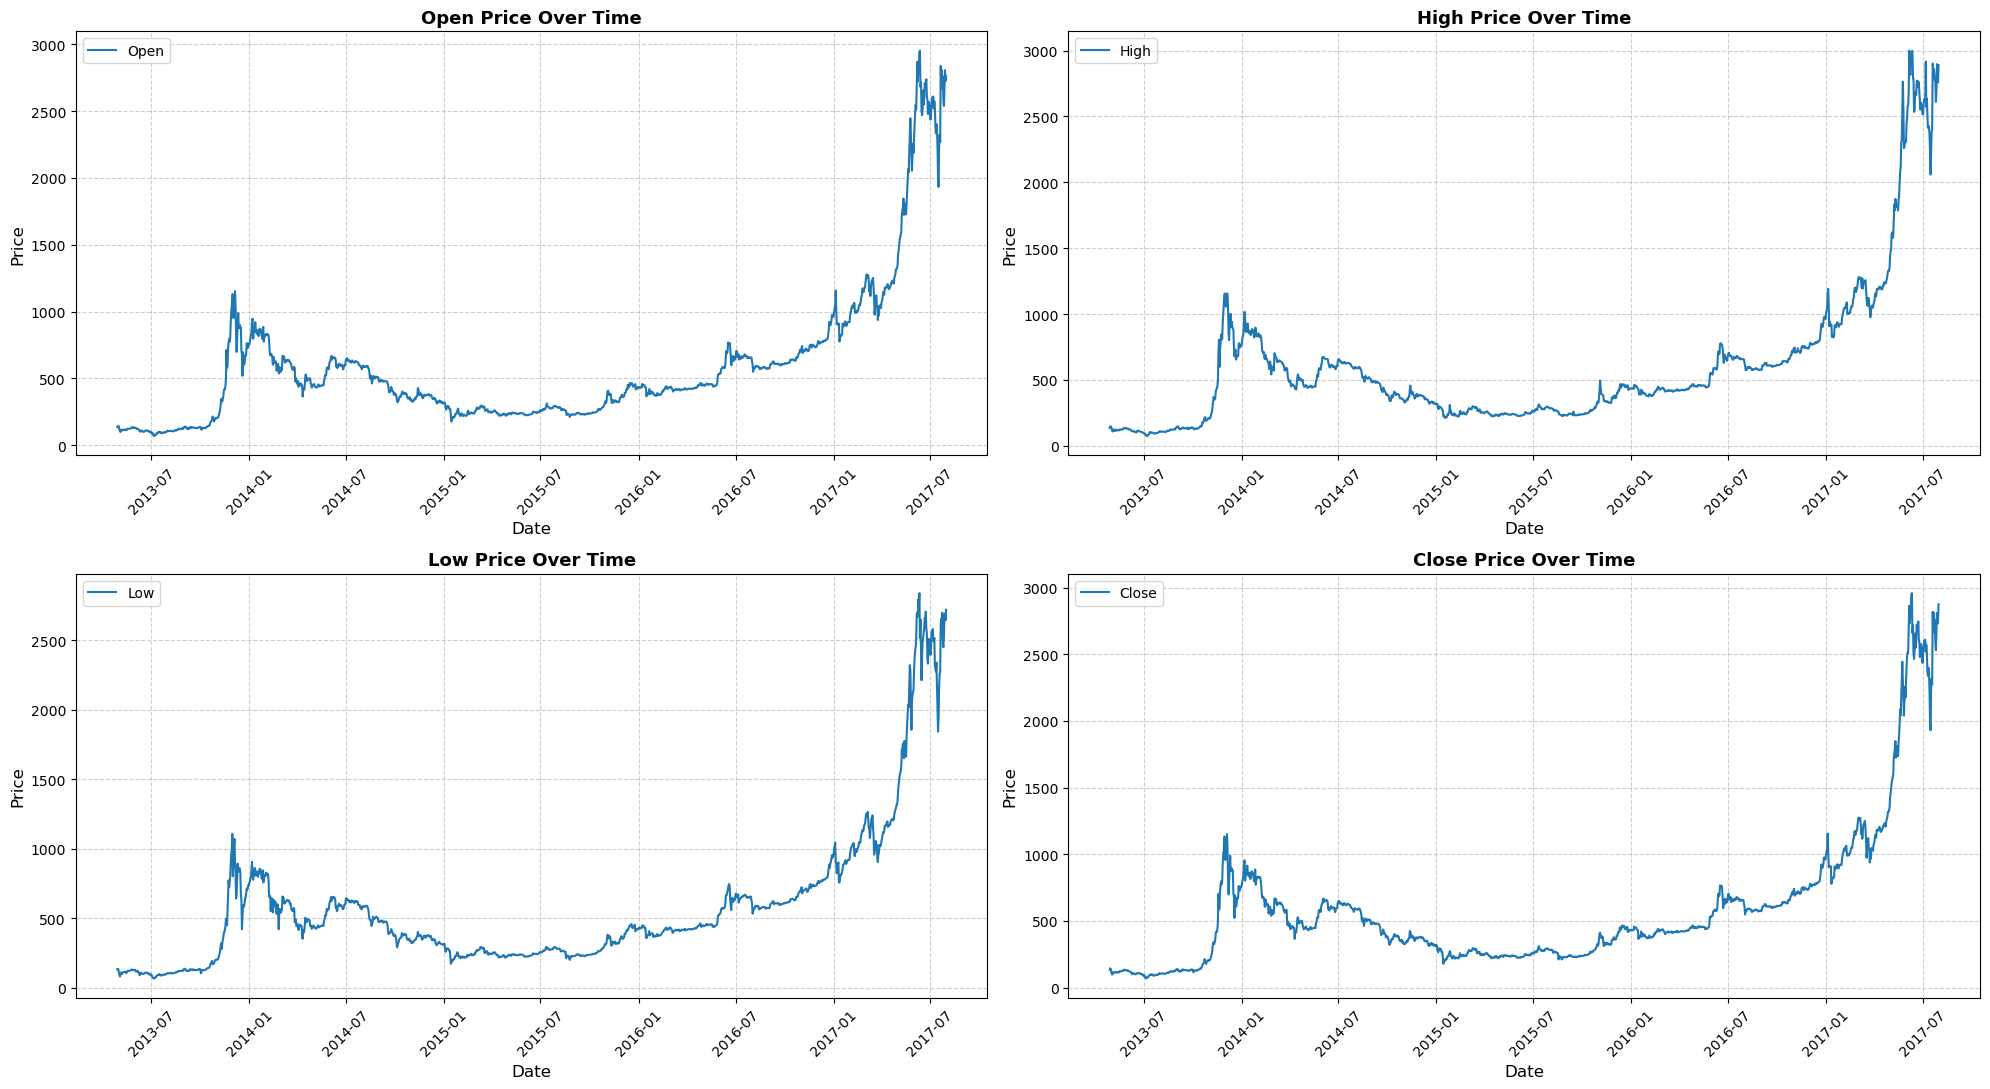

In [769]:
plt.figure(figsize=(20,11))
for index,col in enumerate ([ 'Open', 'High', 'Low', 'Close'],1):
    plt.subplot(2,2, index)    
    plt.plot(df['Date'],df[col],label=col)
    plt.title(f'{col} Price Over Time', fontsize=13, fontweight='bold')
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.ylabel('Price', fontsize=12)
    plt.xlabel('Date', fontsize=12)
    plt.tight_layout()
    plt.legend()

In [ ]:
#Analysing open , high , low , close value of Bitcoin

In [269]:
data.shape

(1556, 7)

In [270]:
bitcoin_sample= data[0:50]

In [271]:
!pip install chart_studio
!pip install plotly

In [272]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [273]:
init_notebook_mode(connected=True)


In [338]:
trace= go.Candlestick(x=bitcoin_sample['Date'],
               high=bitcoin_sample['High'],
               open=bitcoin_sample['Open'],
               close=bitcoin_sample['Close'],
               low=bitcoin_sample['Low'])               

In [275]:
candle_data= [trace]

In [ ]:
go.Figure(data=candle_data)

In [771]:
fig= go.Figure(data=candle_data)

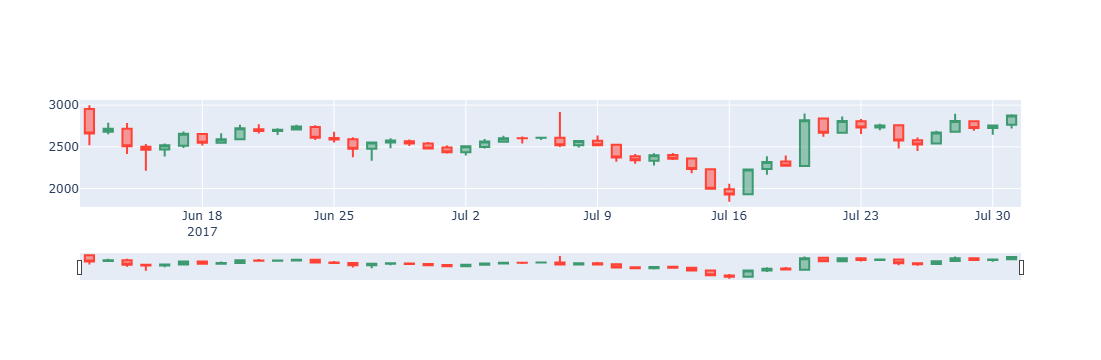

In [318]:
fig

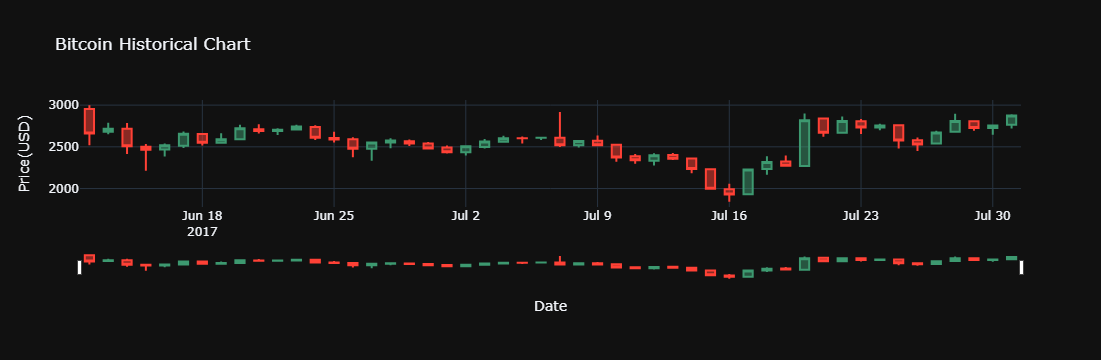

In [334]:
fig.update_layout(title= 'Bitcoin Historical Chart',
                  xaxis_title=' Date', 
                  yaxis_title=' Price(USD)',
                  template='plotly_dark')

In [ ]:
#Analysing closing price (on normal scale & log-scale)

<Axes: >

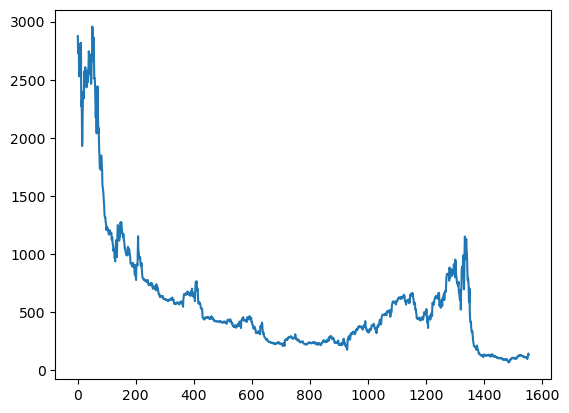

In [356]:
data['Close'].plot()

In [366]:
data.set_index('Date', inplace=True)

In [368]:
data

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
...,...,...,...,...,...,...
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"


<Axes: xlabel='Date'>

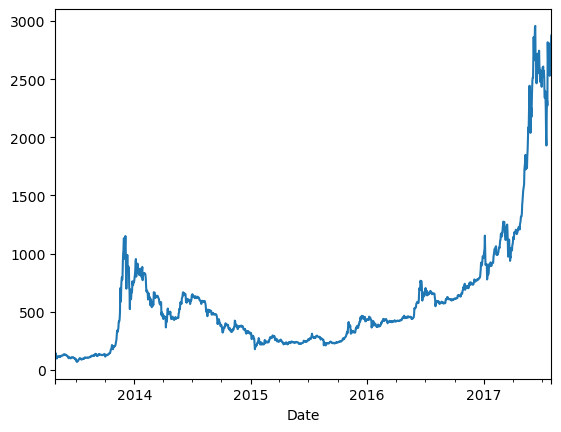

In [372]:
data['Close'].plot()

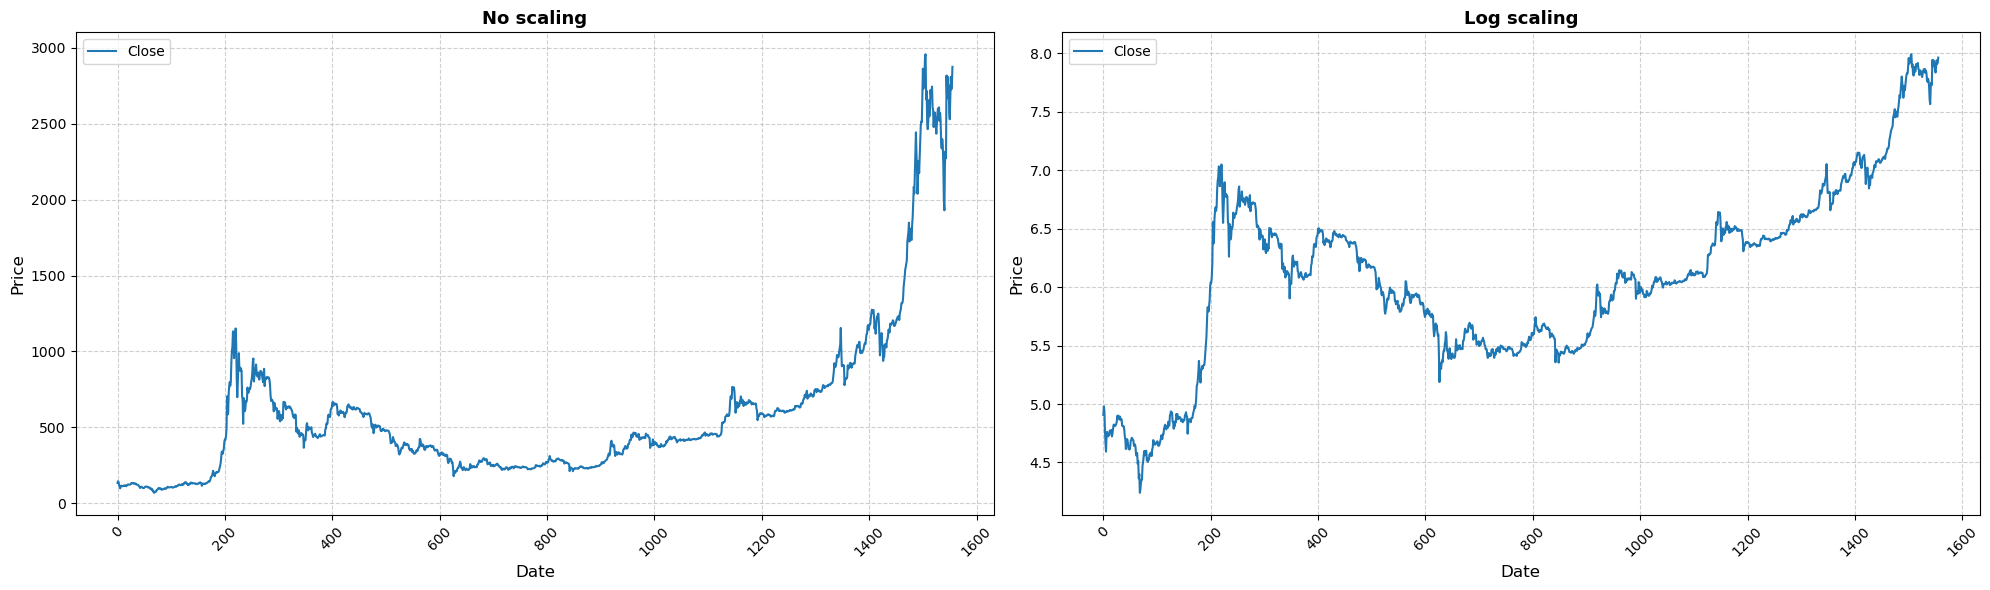

In [773]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
data['Close'].plot()
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.ylabel('Price', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.tight_layout()
plt.title('No scaling', fontsize=13, fontweight='bold')
plt.legend();

plt.subplot(1,2,2)
np.log1p(data['Close']).plot()
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.ylabel('Price', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.tight_layout()
plt.title('Log scaling', fontsize=13, fontweight='bold')
plt.legend();

In [ ]:
# Analyse closing Price on Yearly , Quarterly , monthly basis

In [456]:
data.head(4)

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"


In [476]:
data['Close'].resample('YE').mean()

Date
2013-12-31     257.474476
2014-12-31     527.236658
2015-12-31     272.453260
2016-12-31     568.492131
2017-12-31    1628.622123
Freq: YE-DEC, Name: Close, dtype: float64

In [510]:
data['Close'].resample('QE').mean()

Date
2013-06-30     115.162188
2013-09-30     111.291196
2013-12-31     502.657609
2014-03-31     700.586000
2014-06-30     520.929341
2014-09-30     534.055435
2014-12-31     357.075761
2015-03-31     251.209333
2015-06-30     236.858022
2015-09-30     254.859891
2015-12-31     346.037065
2016-03-31     410.728571
2016-06-30     512.492747
2016-09-30     615.702283
2016-12-31     732.721413
2017-03-31    1034.707444
2017-06-30    1912.552198
2017-09-30    2519.418387
Freq: QE-DEC, Name: Close, dtype: float64

In [512]:
data['Close'].resample('ME').mean()

Date
2013-04-30     139.250000
2013-05-31     119.993226
2013-06-30     107.761333
2013-07-31      90.512258
2013-08-31     113.905161
2013-09-30     130.061667
2013-10-31     158.311935
2013-11-30     550.420667
2013-12-31     800.780968
2014-01-31     844.168387
2014-02-28     661.618214
2014-03-31     592.200323
2014-04-30     461.362000
2014-05-31     486.651290
2014-06-30     615.917333
2014-07-31     618.025484
2014-08-31     536.087742
2014-09-30     445.186333
2014-10-31     364.150000
2014-11-30     366.100000
2014-12-31     341.268387
2015-01-31     248.782581
2015-02-28     234.153571
2015-03-31     269.041290
2015-04-30     235.491667
2015-05-31     236.996774
2015-06-30     238.081000
2015-07-31     279.563871
2015-08-31     250.734516
2015-09-30     233.595333
2015-10-31     264.855161
2015-11-30     348.883333
2015-12-31     424.464516
2016-01-31     410.844516
2016-02-29     404.408276
2016-03-31     416.525161
2016-04-30     434.339333
2016-05-31     461.953871
2016-06

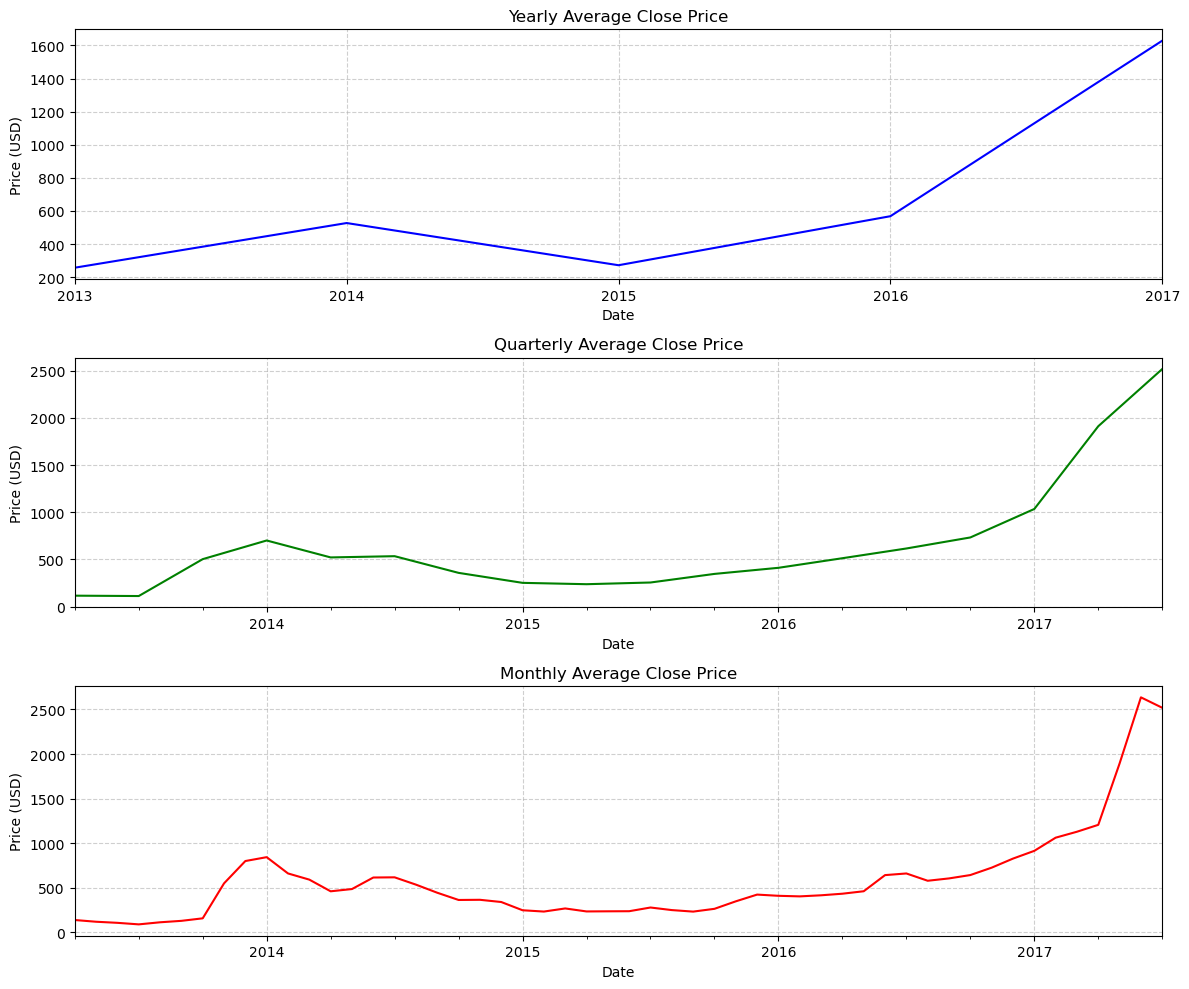

In [546]:
fig, axes=plt.subplots(3, 1, figsize=(12, 10))
data['Close'].resample('YE').mean().plot(ax=axes[0], title="Yearly Average Close Price", color='blue')
axes[0].set_ylabel("Price (USD)")
axes[0].grid(True, linestyle='--', alpha=0.6)

data['Close'].resample('QE').mean().plot(ax=axes[1], title="Quarterly Average Close Price", color='green')
axes[1].set_ylabel("Price (USD)")
axes[1].grid(True, linestyle='--', alpha=0.6)

data['Close'].resample('ME').mean().plot(ax=axes[2], title="Monthly Average Close Price", color='red')
axes[2].set_ylabel("Price (USD)")
axes[2].grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

In [ ]:
#Analysing Daily change in Closing price of stocks

In [618]:
data['Close']

Date
2017-07-31    2875.34
2017-07-30    2757.18
2017-07-29    2726.45
2017-07-28    2809.01
2017-07-27    2671.78
               ...   
2013-05-02     105.21
2013-05-01     116.99
2013-04-30     139.00
2013-04-29     144.54
2013-04-28     134.21
Name: Close, Length: 1556, dtype: float64

In [638]:
data['Close_price_pct_change']= data['Close'].pct_change()*100

In [640]:
data['Close_price_pct_change']

Date
2017-07-31          NaN
2017-07-30    -4.109427
2017-07-29    -1.114545
2017-07-28     3.028113
2017-07-27    -4.885351
                ...    
2013-05-02     7.631714
2013-05-01    11.196654
2013-04-30    18.813574
2013-04-29     3.985612
2013-04-28    -7.146811
Name: Close_price_pct_change, Length: 1556, dtype: float64

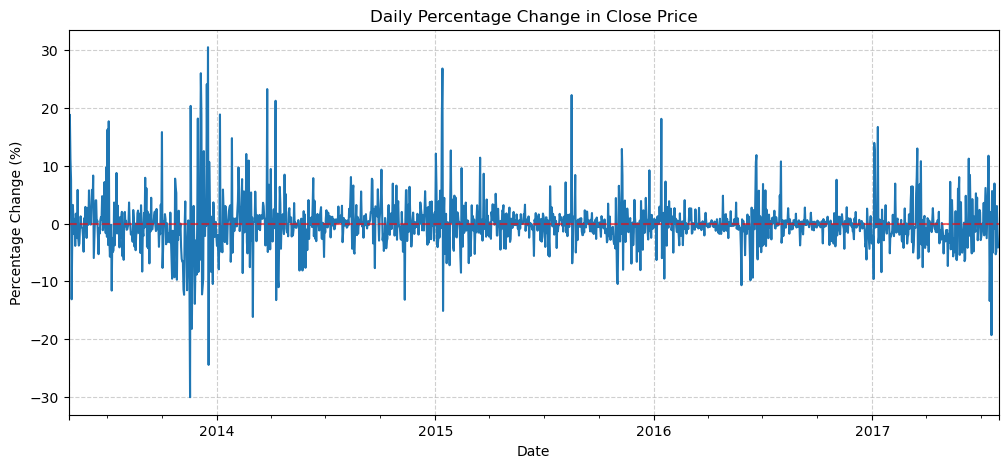

In [670]:
data['Close_price_pct_change'].plot(figsize=(12,5))
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylabel('Percentage Change (%)')
plt.xlabel('Date')
plt.title('Daily Percentage Change in Close Price')
plt.axhline(0, color='red', linestyle='--', alpha=0.6)

In [720]:
!pip install cufflinks

In [724]:
import cufflinks as cf

In [728]:
cf.go_offline()

C:\Users\tanma\anaconda3\Lib\site-packages\cufflinks\plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



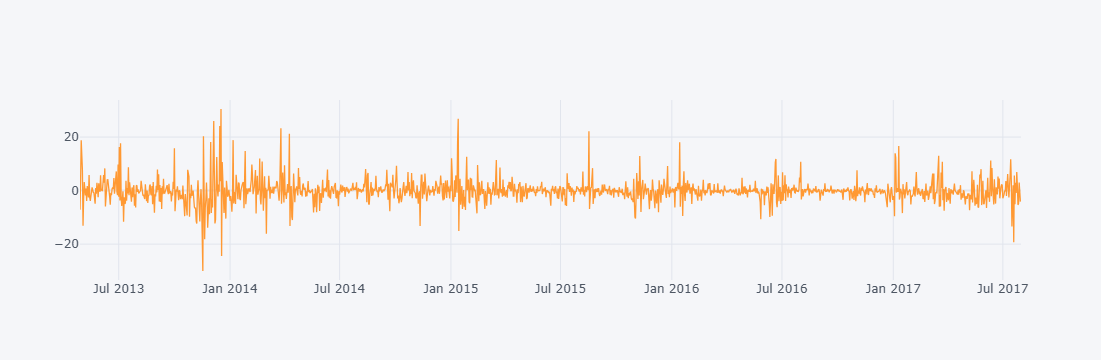

In [732]:
data['Close_price_pct_change'].iplot()

In [734]:
data.index = data.index.astype(str)

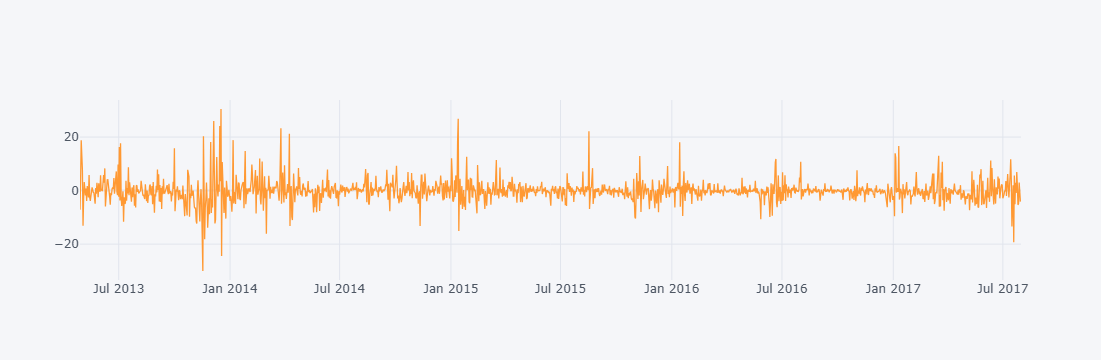

In [737]:
data['Close_price_pct_change'].iplot()